## Luther Kaggle Data

I am working on this data concurrently with troubleshooting my webscraping code.  I will either use this data to enrich the data I pulled or as a substitute whilst still waiting for the code to finsh running.

The first section below will be involving only the main ted data.  I will be making the assumption that the view maturity of a video will be a year after its release.  I will store all data that has not been published for more than a year in its own df, and webscrape the current views to be used as a test set for my model.

In [4]:
import pandas as pd
import numpy as np
import re
import time
from datetime import *
import dateutil.parser
%matplotlib inline
%config InlineBackend.figure_format = 'png'
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 400

In [28]:
data = pd.read_csv('ted_main.csv')


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
comments              2550 non-null int64
description           2550 non-null object
duration              2550 non-null int64
event                 2550 non-null object
film_date             2550 non-null int64
languages             2550 non-null int64
main_speaker          2550 non-null object
name                  2550 non-null object
num_speaker           2550 non-null int64
published_date        2550 non-null int64
ratings               2550 non-null object
related_talks         2550 non-null object
speaker_occupation    2544 non-null object
tags                  2550 non-null object
title                 2550 non-null object
url                   2550 non-null object
views                 2550 non-null int64
dtypes: int64(7), object(10)
memory usage: 338.8+ KB


In [30]:
data.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [31]:
def CleanCols(df):
    df.drop('url', axis=1, inplace = True)
    df.drop('description', axis=1, inplace = True)
    df.drop('name', axis=1, inplace = True)
    data['published_date'] = data['published_date'].apply(lambda x: datetime.fromtimestamp(x).date())
    data['film_date'] = data['film_date'].apply(lambda x: datetime.fromtimestamp(x).date())
    data['days_online'] = data['published_date'].apply(lambda x: ((dateutil.parser.parse('9/22/2017').date()-x)))
    data['days_online'] = (data['days_online']/np.timedelta64(1, 'D')).astype(int)
    data['duration'] = round(data['duration']/60,2)
    data['views_pd'] = round(data['views']/data['days_online'])
    return df

In [32]:
#Removing unnecessary columns
CleanCols(data)


,comments,duration,event,film_date,languages,main_speaker,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,views,days_online,views_pd
0,4553,19.40,TED2006,2006-02-24,60,Ken Robinson,1,2006-06-26,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,47227110,4106,1.150200e+04
1,265,16.28,TED2006,2006-02-24,43,Al Gore,1,2006-06-26,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,3200520,4106,7.790000e+02
2,124,21.43,TED2006,2006-02-23,26,David Pogue,1,2006-06-26,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,1636292,4106,3.990000e+02
3,200,18.60,TED2006,2006-02-25,35,Majora Carter,1,2006-06-26,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,1697550,4106,4.130000e+02
4,593,19.83,TED2006,2006-02-21,48,Hans Rosling,1,2006-06-27,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,12005869,4105,2.925000e+03
5,672,21.75,TED2006,2006-02-01,36,Tony Robbins,1,2006-06-27,"[{'id': 7, 'name': 'Funny', 'count': 1102}, {'...","[{'id': 229, 'hero': 'https://pe.tedcdn.com/im...",Life coach; expert in leadership psychology,"['business', 'culture', 'entertainment', 'goal...",Why we do what we do,20685401,4105,5.039000e+03
6,919,16.53,TED2006,2006-02-23,31,Julia Sweeney,1,2006-07-09,"[{'id': 3, 'name': 'Courageous', 'count': 477}...","[{'id': 22, 'hero': 'https://pe.tedcdn.com/ima...","Actor, comedian, playwright","['Christianity', 'God', 'atheism', 'comedy', '...",Letting go of God,3769987,4093,9.210000e+02
7,46,19.97,TED2006,2006-02-22,19,Joshua Prince-Ramus,1,2006-07-09,"[{'id': 9, 'name': 'Ingenious', 'count': 195},...","[{'id': 750, 'hero': 'https://pe.tedcdn.com/im...",Architect,"['architecture', 'collaboration', 'culture', '...",Behind the design of Seattle's library,967741,4093,2.360000e+02
8,852,24.75,TED2006,2006-02-01,32,Dan Dennett,1,2006-07-17,"[{'id': 3, 'name': 'Courageous', 'count': 562}...","[{'id': 71, 'hero': 'https://pe.tedcdn.com/ima...","Philosopher, cognitive scientist","['God', 'TED Brain Trust', 'atheism', 'brain',...",Let's teach religion -- all religion -- in sch...,2567958,4085,6.290000e+02
9,900,21.03,TED2006,2006-02-24,31,Rick Warren,1,2006-07-17,"[{'id': 21, 'name': 'Unconvincing', 'count': 8...","[{'id': 94, 'hero': 'https://pe.tedcdn.com/ima...","Pastor, author","['Christianity', 'God', 'culture', 'happiness'...",A life of purpose,3095993,4085,7.580000e+02


In [33]:
data.columns

Index(['comments', 'duration', 'event', 'film_date', 'languages',
       'main_speaker', 'num_speaker', 'published_date', 'ratings',
       'related_talks', 'speaker_occupation', 'tags', 'title', 'views',
       'days_online', 'views_pd'],
      dtype='object')

In [34]:
test_df = data[data['days_online'] < 364]
test_df

,comments,duration,event,film_date,languages,main_speaker,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,views,days_online,views_pd
2288,66,14.70,TEDNYC,2016-09-06,21,J.D. Vance,1,2016-09-26,"[{'id': 1, 'name': 'Beautiful', 'count': 96}, ...","[{'id': 2328, 'hero': 'https://pe.tedcdn.com/i...",Author,"['TEDNYC', 'United States', 'capitalism', 'chi...",America's forgotten working class,1077686,361,2.985000e+03
2289,23,4.60,TED Studio,2016-05-31,33,Camille A. Brown,1,2016-09-27,"[{'id': 1, 'name': 'Beautiful', 'count': 430},...","[{'id': 652, 'hero': 'https://pe.tedcdn.com/im...",Choreographer and educator,"['Africa', 'Slavery', 'TED Fellows', 'art', 'c...",A visual history of social dance in 25 moves,778810,360,2.163000e+03
2290,20,13.35,TED@BCG Paris,2016-05-17,21,Oded Shoseyov,1,2016-09-28,"[{'id': 8, 'name': 'Informative', 'count': 410...","[{'id': 2558, 'hero': 'https://pe.tedcdn.com/i...",Nanobiotechnologist,"['DNA', 'animals', 'biodiversity', 'biology', ...",How we're harnessing nature's hidden superpowers,1211098,359,3.374000e+03
2291,490,14.45,TEDSummit,2016-06-25,27,Sam Harris,1,2016-09-29,"[{'id': 8, 'name': 'Informative', 'count': 813...","[{'id': 2243, 'hero': 'https://pe.tedcdn.com/i...","Neuroscientist, philosopher","['AI', 'brain', 'choice', 'future', 'history',...",Can we build AI without losing control over it?,2592561,358,7.242000e+03
2292,36,19.08,TEDSummit,2016-06-26,25,Helen Fisher,1,2016-09-30,"[{'id': 25, 'name': 'OK', 'count': 124}, {'id'...","[{'id': 2330, 'hero': 'https://pe.tedcdn.com/i...","Anthropologist, expert on love","['Internet', 'anthropology', 'communication', ...",Technology hasn't changed love. Here's why,1593458,357,4.463000e+03
2293,39,9.88,TEDSummit,2016-06-26,28,Ellen Jorgensen,1,2016-10-03,"[{'id': 8, 'name': 'Informative', 'count': 426...","[{'id': 2354, 'hero': 'https://pe.tedcdn.com/i...","Biologist, community science advocate","['CRISPR', 'DNA', 'biology', 'biomechanics', '...",What you need to know about CRISPR,1400803,354,3.957000e+03
2294,72,12.70,TEDNYC,2016-09-06,22,Sayu Bhojwani,1,2016-10-04,"[{'id': 3, 'name': 'Courageous', 'count': 144}...","[{'id': 2543, 'hero': 'https://pe.tedcdn.com/i...",Immigration scholar,"['TEDNYC', 'United States', 'community', 'demo...",Immigrant voices make democracy stronger,783649,353,2.220000e+03
2295,56,12.70,TEDxStanford,2016-04-23,23,Adam de la Zerda,1,2016-10-05,"[{'id': 8, 'name': 'Informative', 'count': 251...","[{'id': 1939, 'hero': 'https://pe.tedcdn.com/i...","Biologist, electrical engineer","['TEDx', 'brain', 'cancer', 'chemistry', 'heal...",We can start winning the war against cancer,985203,352,2.799000e+03
2296,109,11.77,TEDSummit,2016-06-25,33,Isaac Lidsky,1,2016-10-06,"[{'id': 10, 'name': 'Inspiring', 'count': 3442...","[{'id': 1951, 'hero': 'https://pe.tedcdn.com/i...","Author, entrepreneur","['Blindness', 'brain', 'choice', 'fear', 'huma...",What reality are you creating for yourself?,2561564,351,7.298000e+03
2297,13,4.48,TED Studio,2016-05-01,33,Rainn Wilson,1,2016-10-07,"[{'id': 7, 'name': 'Funny', 'count': 374}, {'i...","[{'id': 1685, 'hero': 'https://pe.tedcdn.com/i...","Actor, writer","['adventure', 'curiosity', 'entertainment', 'e...",Ideas worth dating,792297,350,2.264000e+03


In [35]:
data = data[data['days_online'] >= 365]

## Preliminary Plots 

Making some preliminary plots to get a better idea of what the data shows and to help decide what factors will be incorporated in the linear regression.  I will need to find a way to normalize the time component so we are comparing apples to apples. Proportions based on dates?  Cut off videos that have not been out for more than a year (since data was taken), then webscrape current views.  Take views, then get a rate by dividing the number of days it has been out.


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns


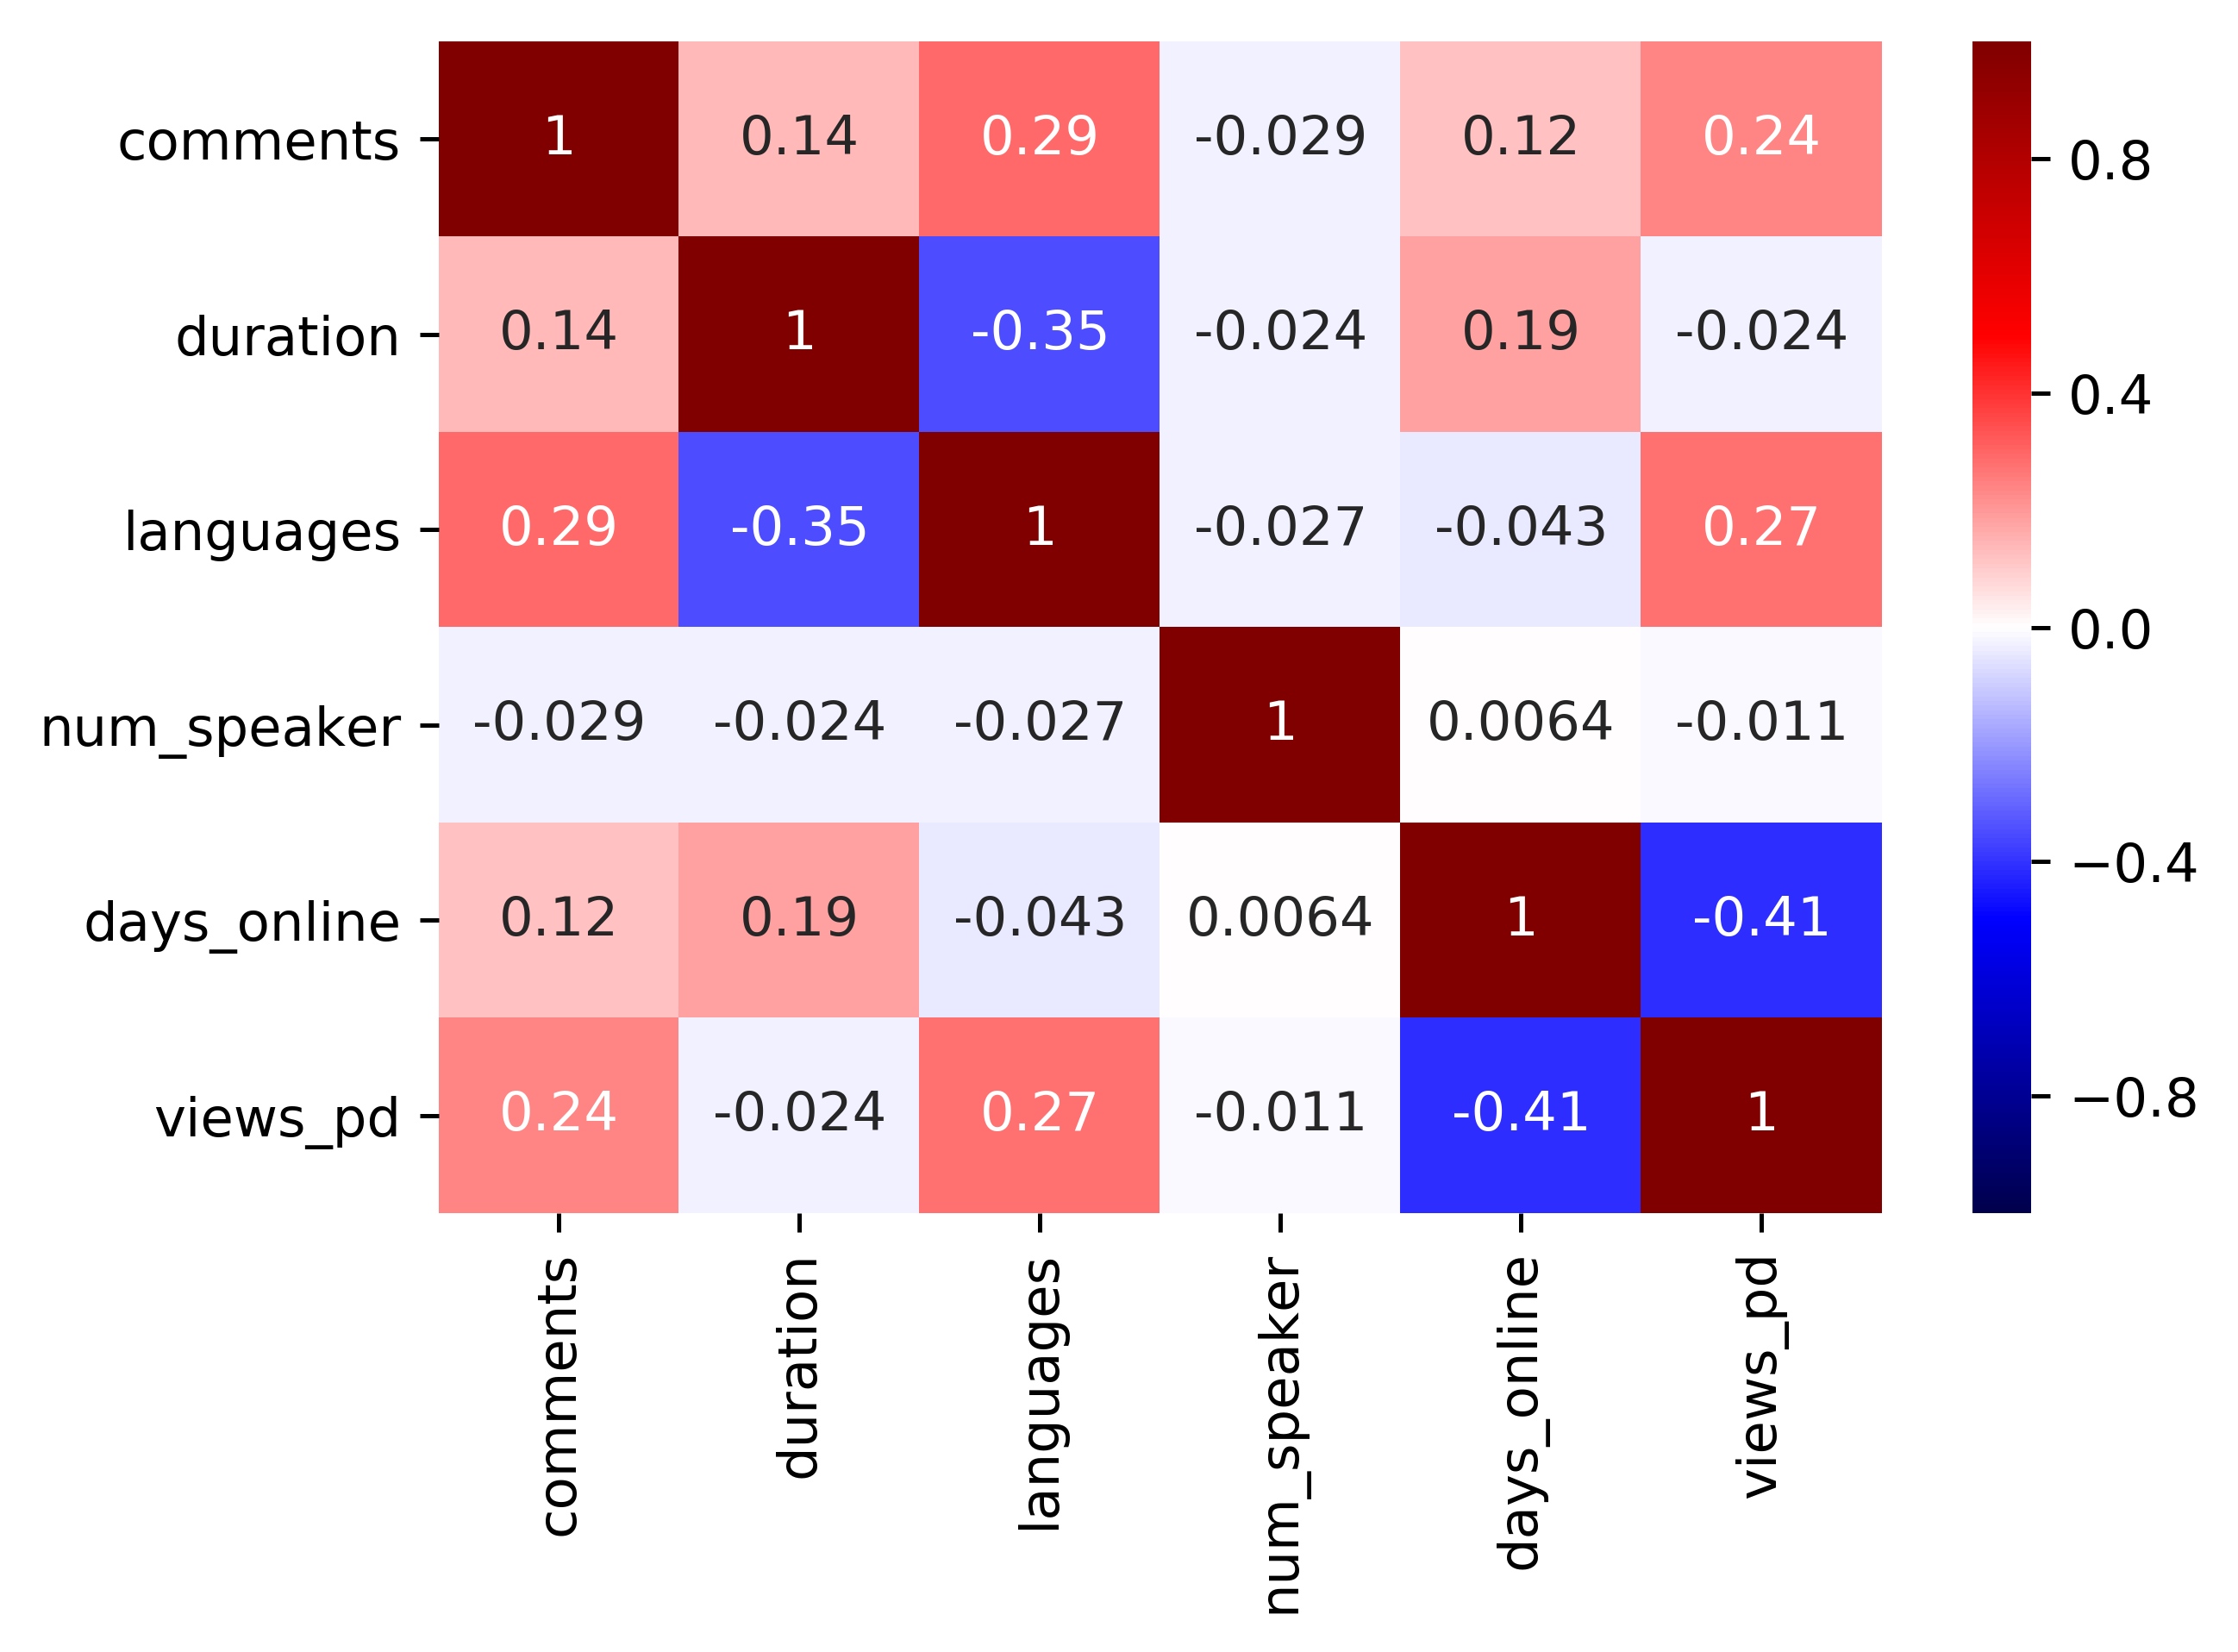

In [37]:
plt.savefig("test.png", format="png")
sns.heatmap(data.drop('views', axis=1).corr(), vmin=-1, vmax=1, cmap=('seismic'), annot = True)

In [38]:
play_df = data[(data['views_pd']<=15000) & (data['duration']<float(40))]

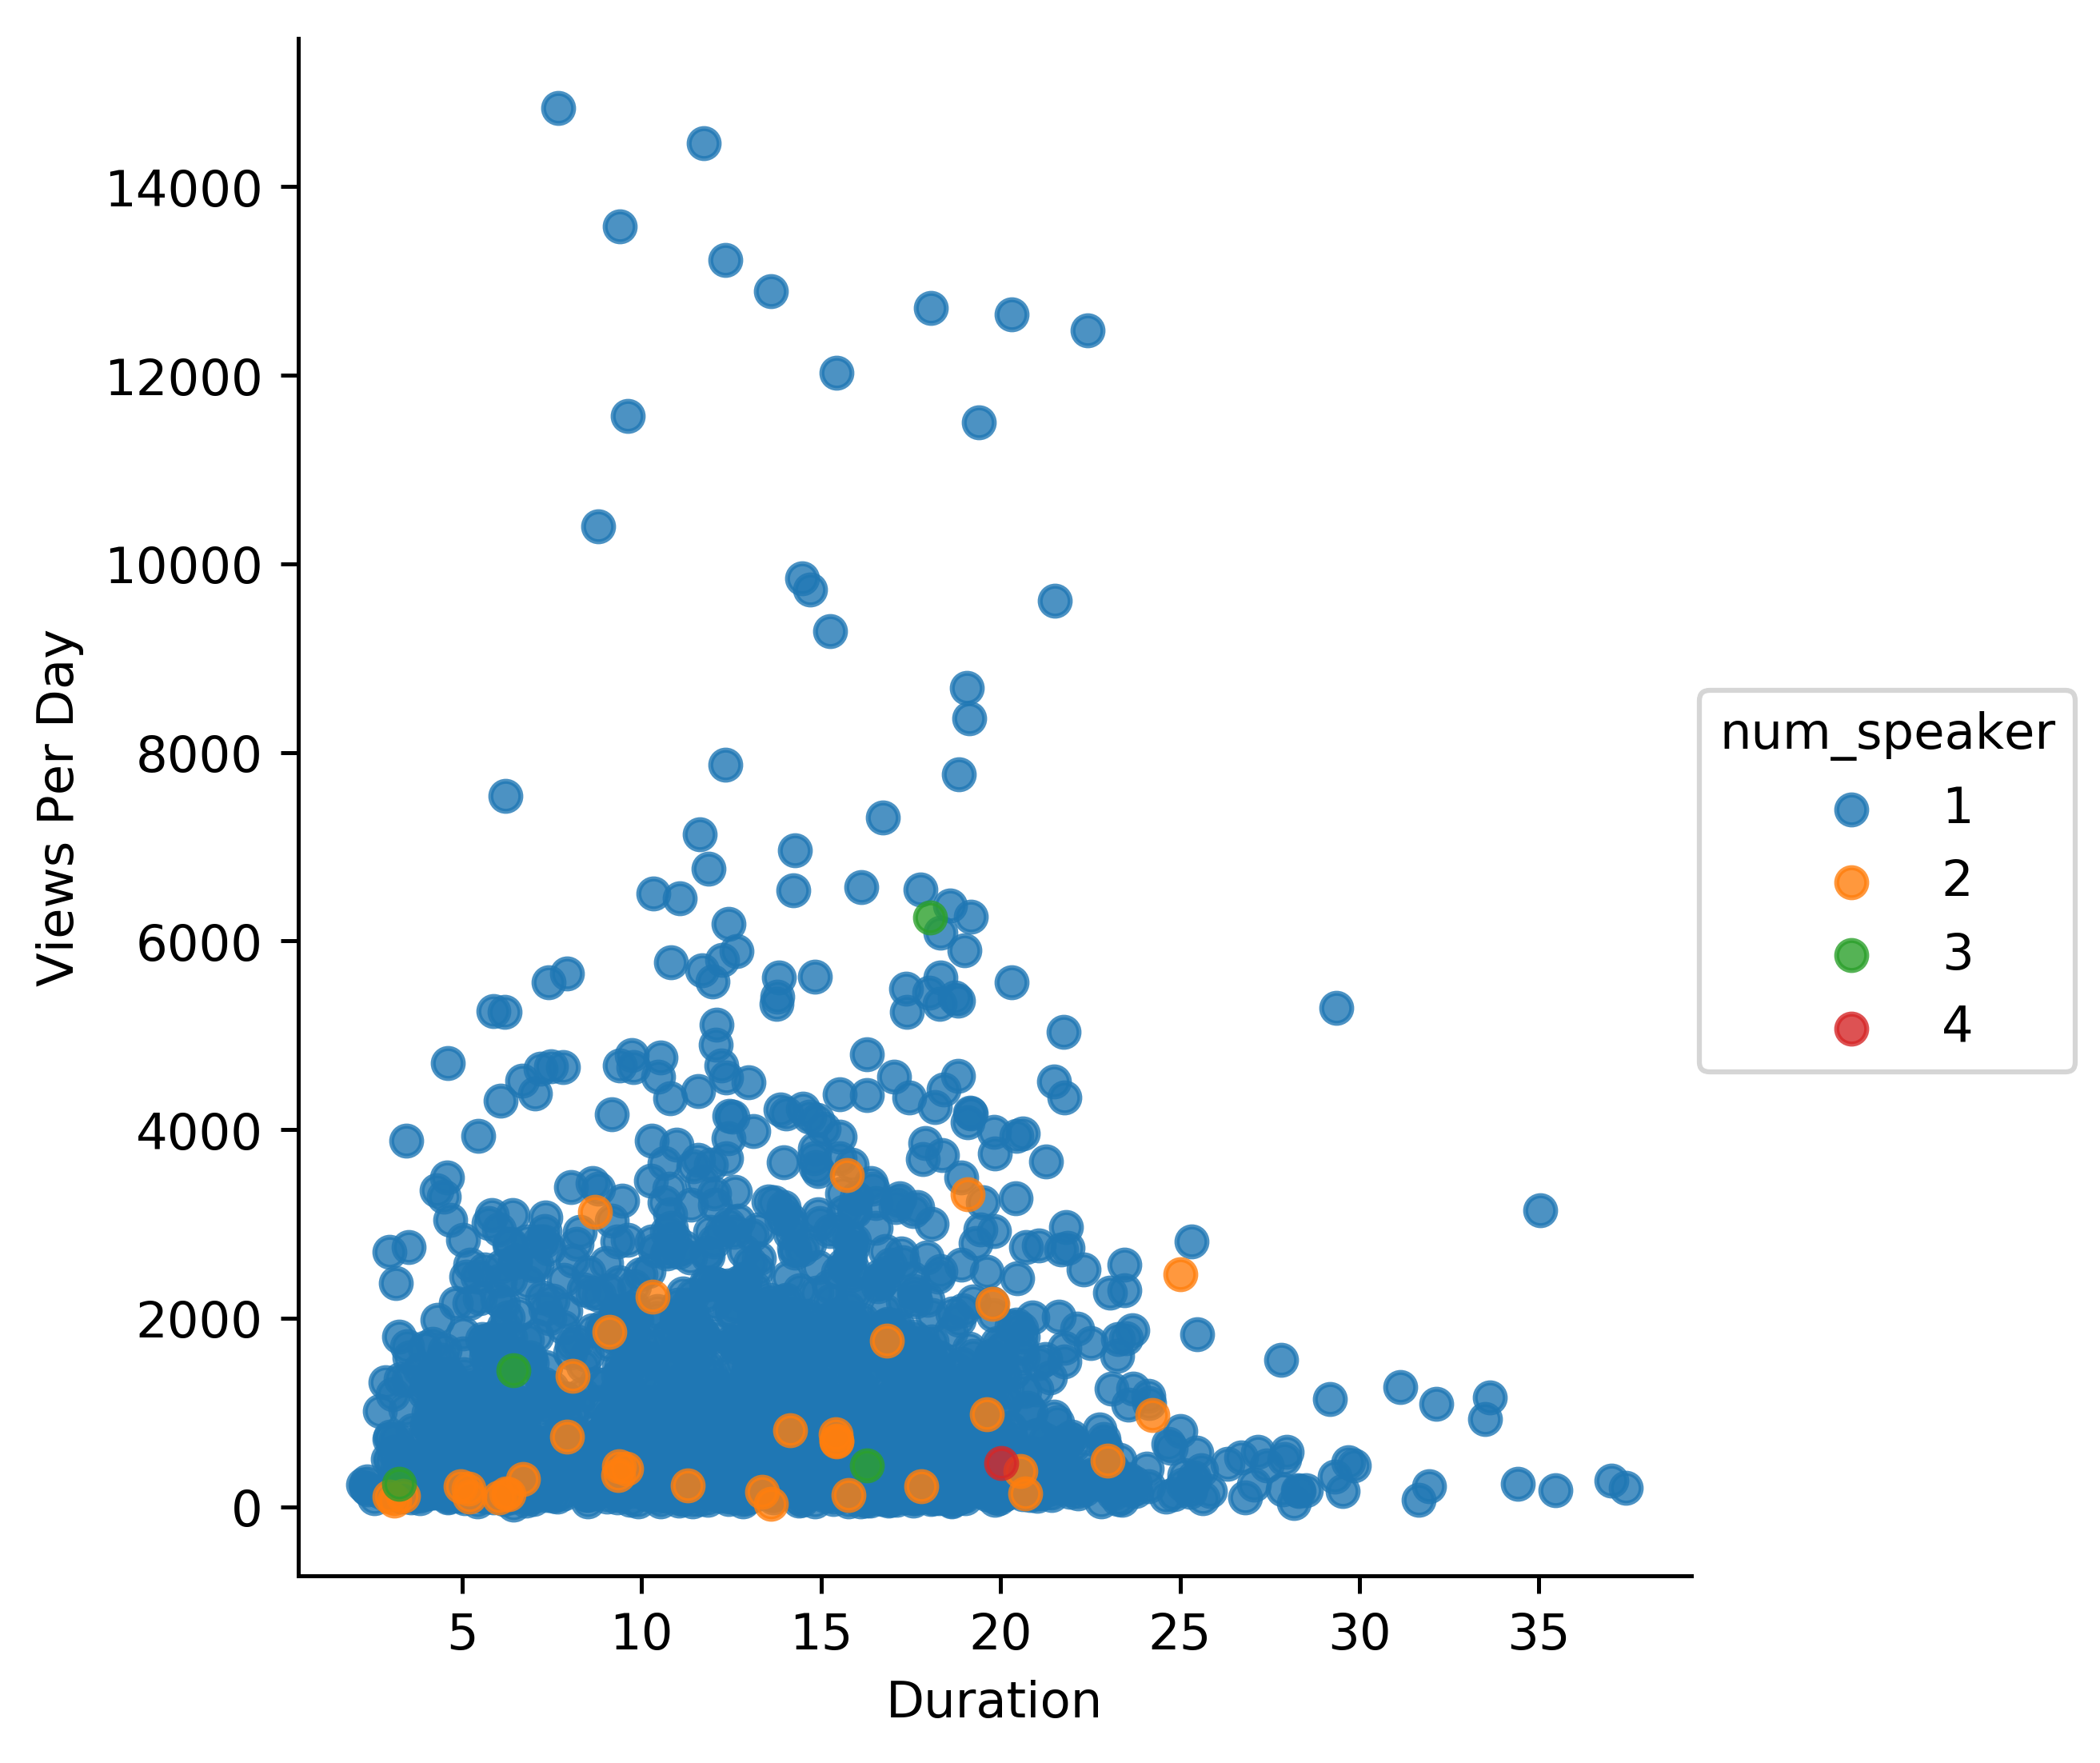

In [39]:
fig = sns.lmplot(y="views_pd", x="duration", data=play_df, hue = 'num_speaker', fit_reg = False)
fig = fig.set_axis_labels('Duration', 'Views Per Day')

In [40]:
four_highest = data[data.views>30000000].ratings.index
four_highest

Int64Index([0, 677, 837, 1346], dtype='int64')

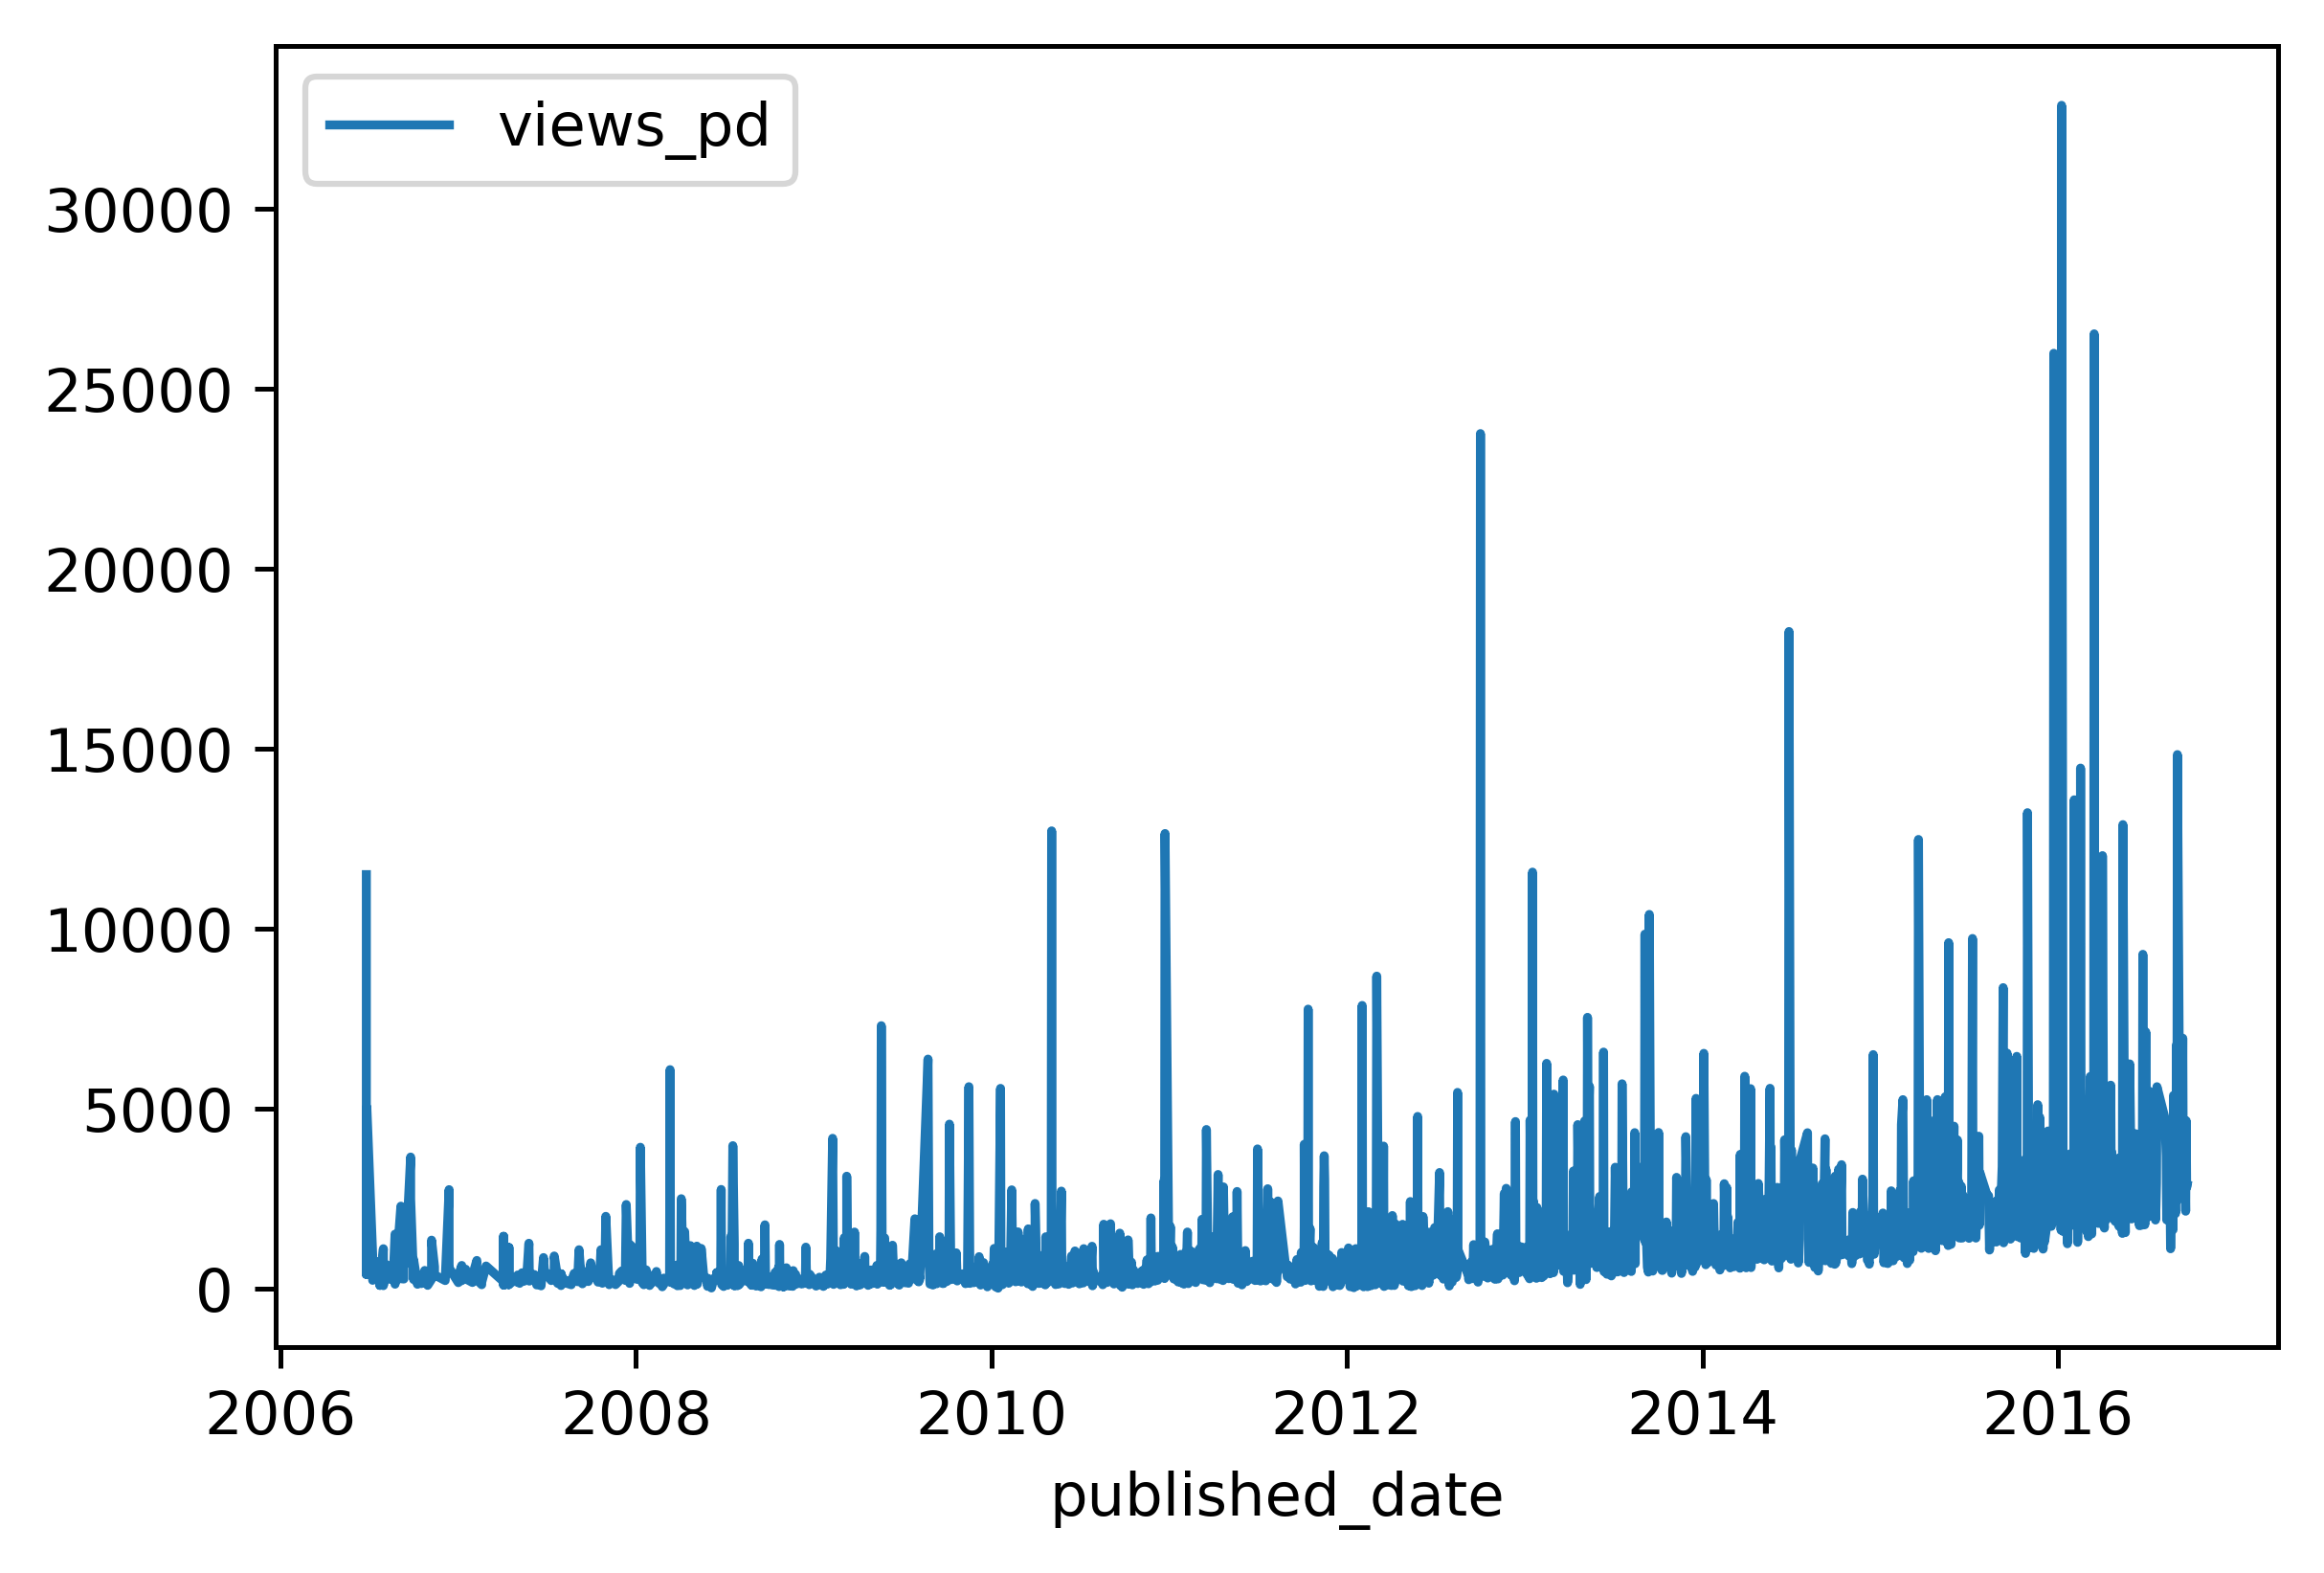

In [41]:
data[['published_date','views_pd']].set_index('published_date').plot()

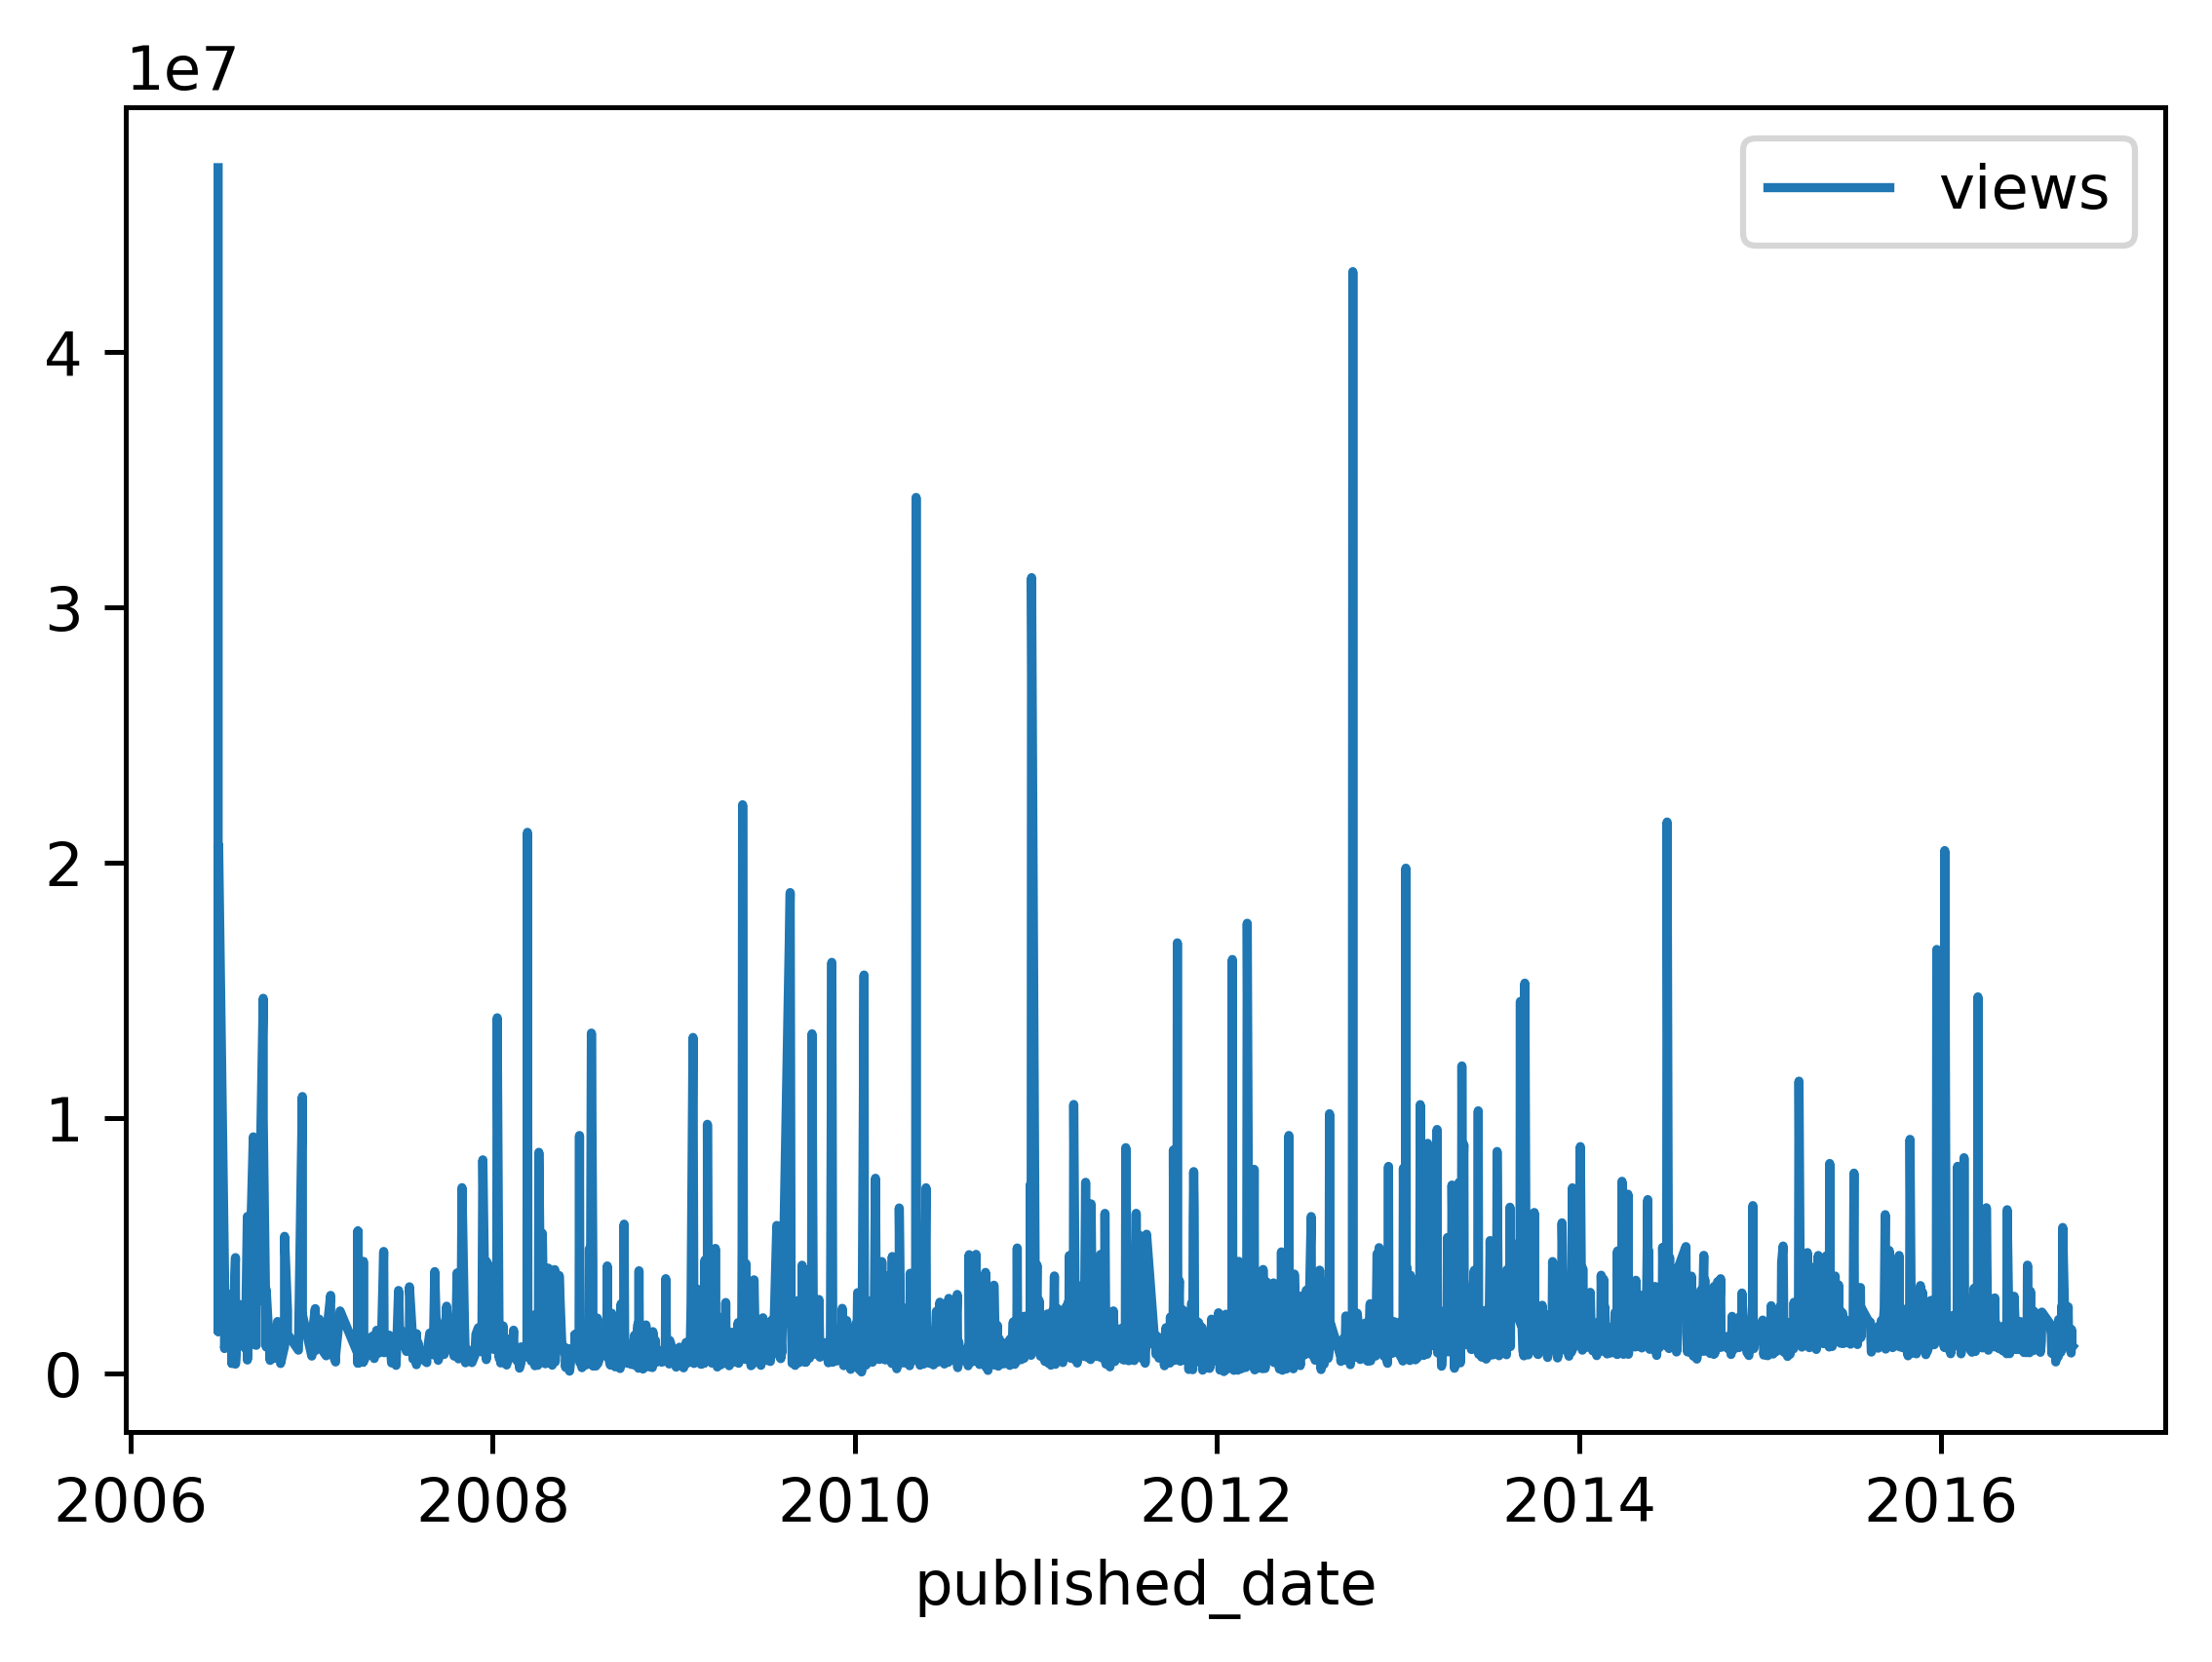

In [42]:
data[['published_date','views']].set_index('published_date').plot()

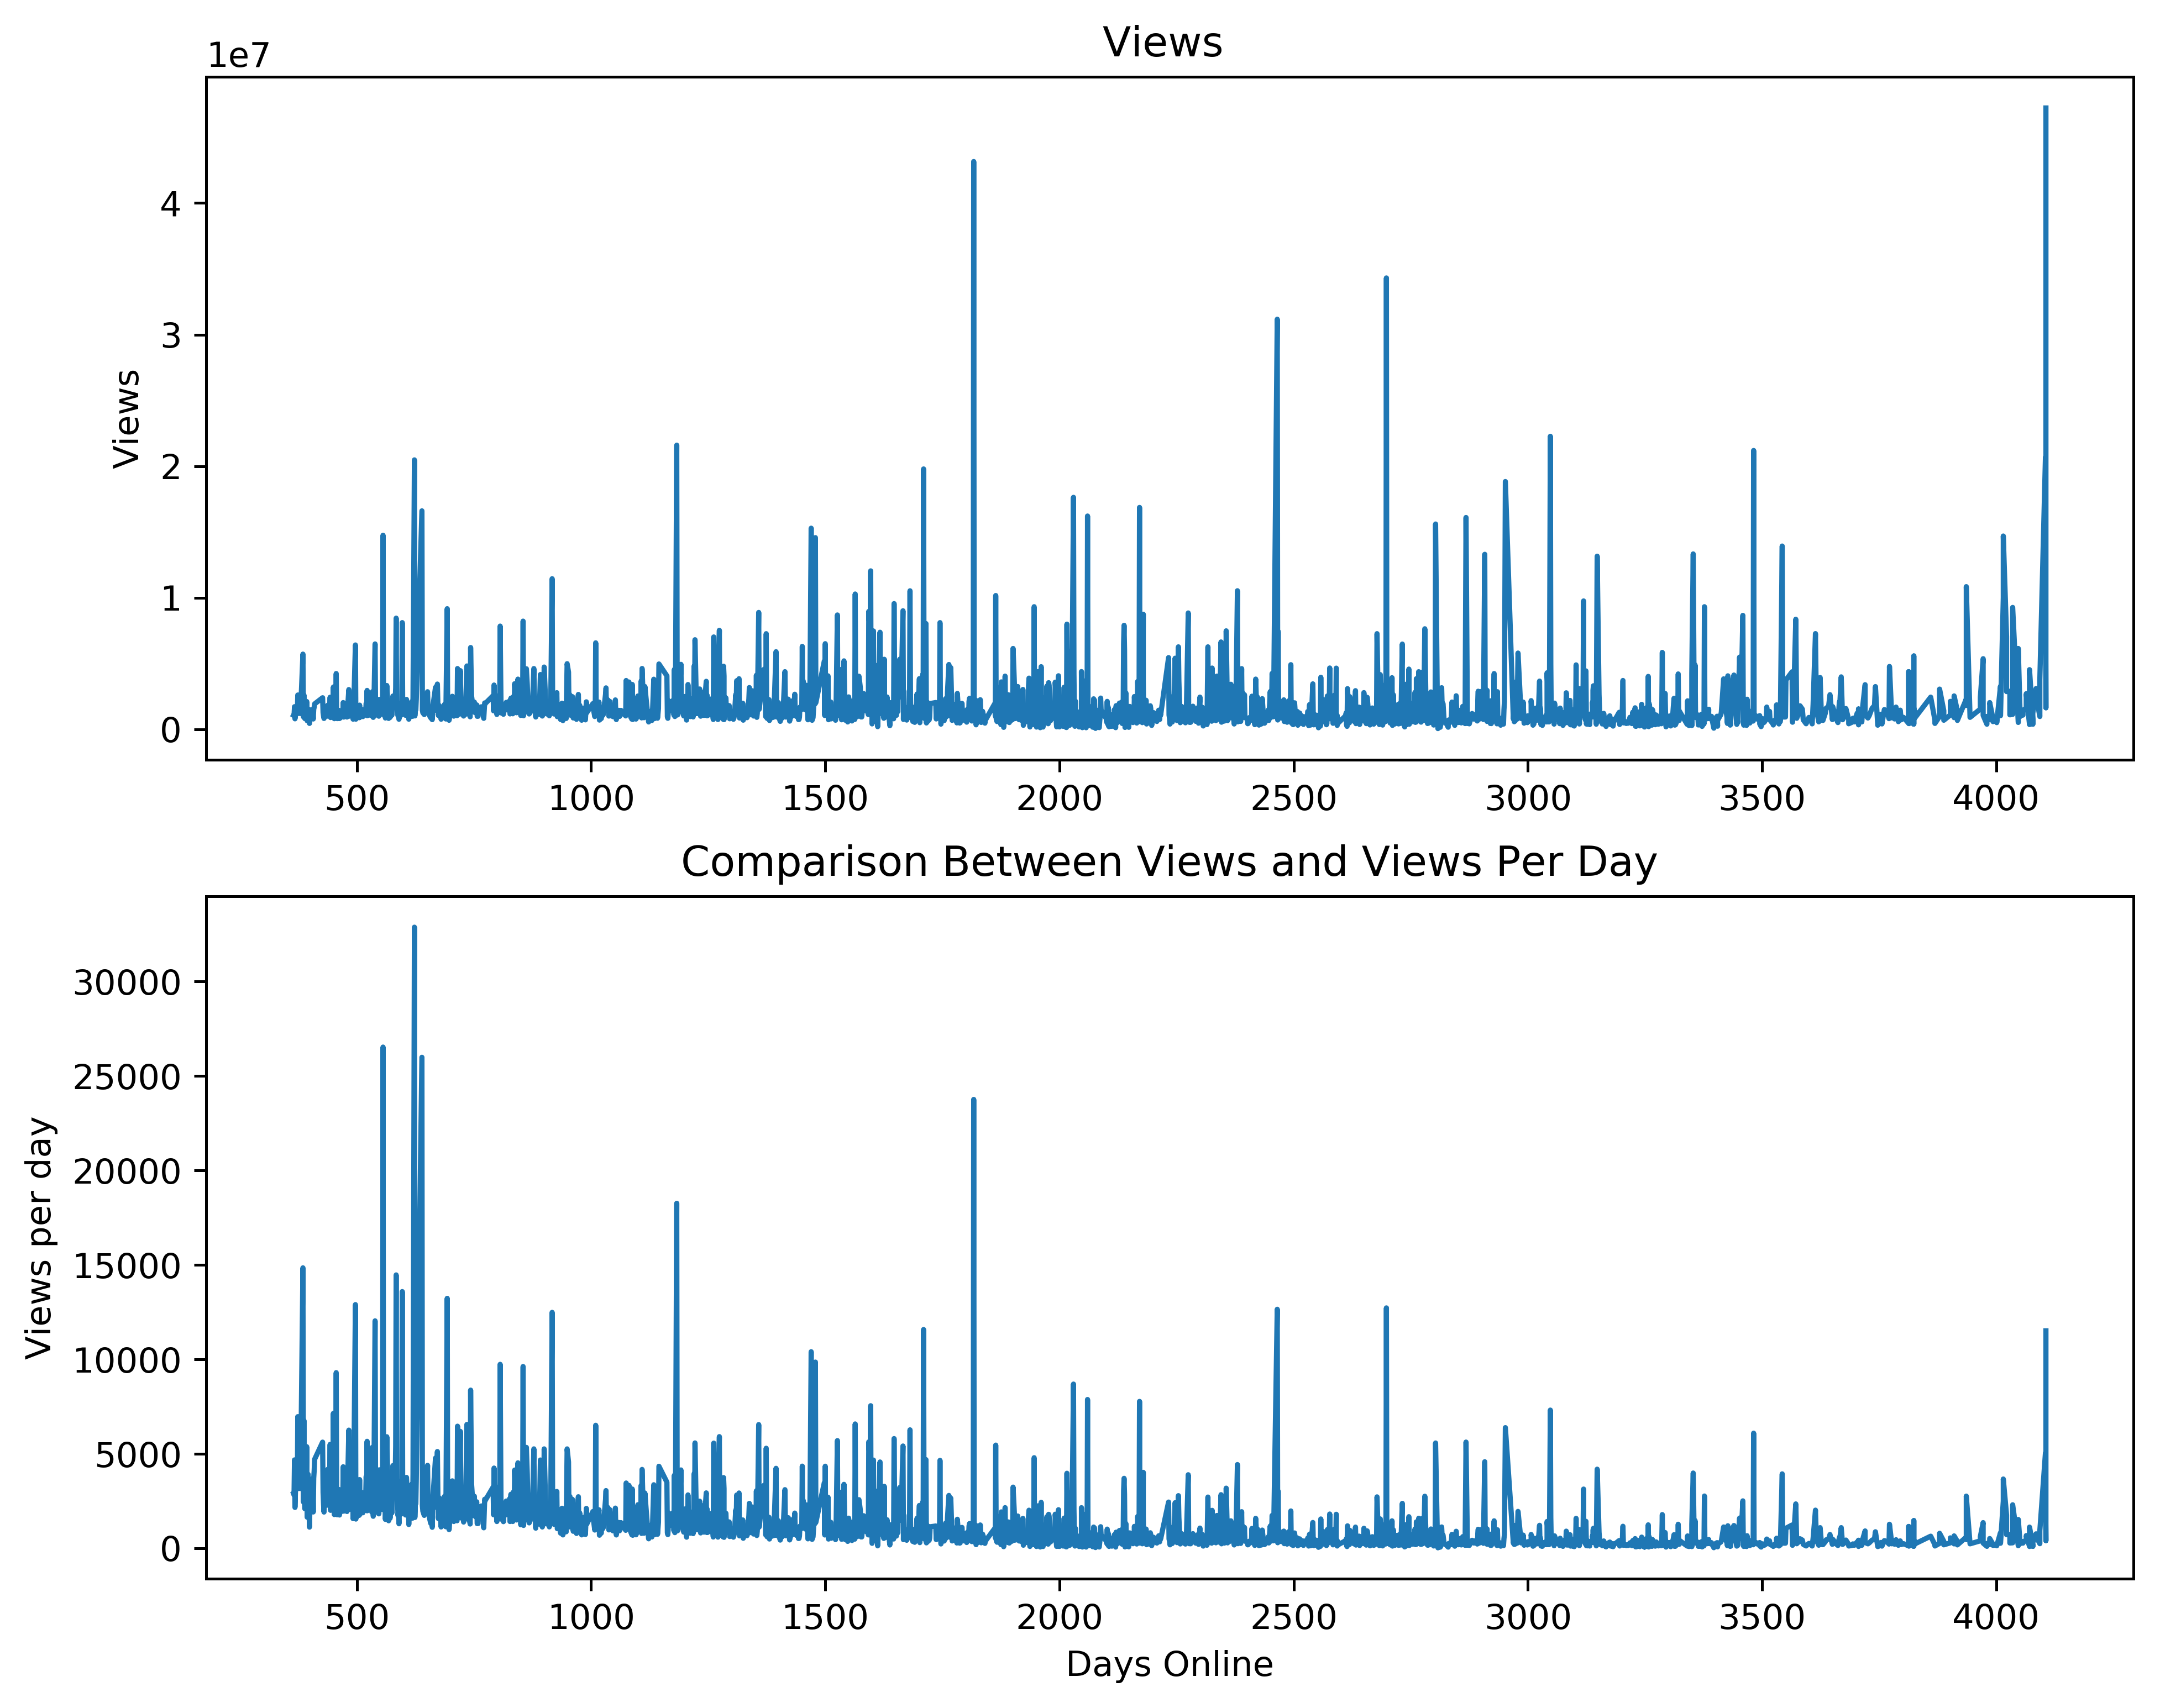

In [43]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))  # 2 Rows, 1 Col

ax[0].plot(data['days_online'],data['views'])
ax[0].set_title('Views ')
ax[0].set_ylabel('Views')

ax[1].plot(data['days_online'], data['views_pd'])
ax[1].set_xlabel('Days Online')
ax[1].set_ylabel('Views per day')
ax[1].set_title('Comparison Between Views and Views Per Day');

## Pulling out reactions

Each video has its own ratings, or reactions the watchers have during or after the video.  Maybe change the ratings to proportions. 

In [44]:
#Pulls the number of tags for a certain tag
def FindTag(tag, sl):
    hand = False
    count = 0
    for i in sl:
        if tag in i:
            hand = True
        elif hand == True:
            count = int(i.split('}')[0].strip())
            hand= False
    return count

In [45]:
# calling in each tag individually to run through the broken comment.  I am doing this so its easier to 
# join the dataframes later (and match the number to the correct column)
def CrackShell(string):
    tag_list=['Courageous', 'Beautiful', 'Confusing', 'Funny', 'Ingenious', 'Unconvincing', \
          'Longwinded', 'Informative', 'Inspiring', 'Fascinating', 'Persuasive', 'Jaw-dropping','Obnoxious']
    comment = string.split(':')
    emotes = []
    #I am searching by tag name because it will be easier to store and import to df later
    for i in tag_list:
        emotes.append(FindTag(i, comment))
    return emotes

In [46]:
emote_dict = {}
tag_list=['Courageous', 'Beautiful', 'Confusing', 'Funny', 'Ingenious', 'Unconvincing', \
          'Longwinded', 'Informative', 'Inspiring', 'Fascinating', 'Persuasive', 'Jaw-dropping','Obnoxious']
for i in range(len(data.ratings)):
        emote_dict[i] = CrackShell(data.ratings[i])

In [47]:
tag_list=['Courageous', 'Beautiful', 'Confusing', 'Funny', 'Ingenious', 'Unconvincing', 'Longwinded', 'Informative', 'Inspiring', 'Fascinating', 'Persuasive', 'Jaw-dropping','Obnoxious']

In [48]:
from pandas import DataFrame
emote_df = pd.DataFrame.from_dict(emote_dict, orient = 'index')

In [49]:
emote_df.columns = tag_list
for i in range(0,len(emote_df.index)-1):
    emote_df.loc[i,:] = emote_df.loc[i,:] / emote_df.loc[i,:].sum()
emote_df

,Courageous,Beautiful,Confusing,Funny,Ingenious,Unconvincing,Longwinded,Informative,Inspiring,Fascinating,Persuasive,Jaw-dropping,Obnoxious
0,0.035101,0.049344,0.002611,0.211975,0.065529,0.003237,0.004176,0.079265,0.268937,0.114172,0.115499,0.047898,0.002255
1,0.050860,0.021222,0.022686,0.199049,0.020490,0.094402,0.041347,0.162093,0.151116,0.048299,0.098061,0.042444,0.047933
2,0.016804,0.022405,0.010082,0.359970,0.068335,0.038835,0.029126,0.147498,0.085885,0.061987,0.085885,0.020164,0.053025
3,0.208619,0.079879,0.008784,0.016195,0.028822,0.009882,0.014548,0.104310,0.293714,0.036234,0.126270,0.063135,0.009607
4,0.012534,0.037128,0.002838,0.054785,0.126202,0.002641,0.004335,0.214134,0.114023,0.181539,0.100189,0.147249,0.002404
5,0.048341,0.047335,0.020181,0.073885,0.026617,0.025277,0.019108,0.069594,0.349380,0.090513,0.162454,0.044854,0.022461
6,0.083831,0.048682,0.012654,0.436555,0.056239,0.039543,0.033919,0.039719,0.076977,0.055536,0.054657,0.010721,0.050967
7,0.035380,0.101977,0.026015,0.009365,0.202914,0.027055,0.027055,0.125911,0.182102,0.159209,0.038502,0.059313,0.005203
8,0.148207,0.038238,0.018460,0.015823,0.055643,0.074631,0.046677,0.164293,0.116297,0.082542,0.201477,0.015823,0.021888
9,0.058896,0.094902,0.013734,0.003217,0.014353,0.103687,0.037862,0.037614,0.316258,0.056793,0.190918,0.025860,0.045904


In [50]:
data= data.join(emote_df)
df= data.drop('ratings', axis=1)
df

,comments,duration,event,film_date,languages,main_speaker,num_speaker,published_date,related_talks,speaker_occupation,...,Funny,Ingenious,Unconvincing,Longwinded,Informative,Inspiring,Fascinating,Persuasive,Jaw-dropping,Obnoxious
0,4553,19.40,TED2006,2006-02-24,60,Ken Robinson,1,2006-06-26,"[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,...,0.211975,0.065529,0.003237,0.004176,0.079265,0.268937,0.114172,0.115499,0.047898,0.002255
1,265,16.28,TED2006,2006-02-24,43,Al Gore,1,2006-06-26,"[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,...,0.199049,0.020490,0.094402,0.041347,0.162093,0.151116,0.048299,0.098061,0.042444,0.047933
2,124,21.43,TED2006,2006-02-23,26,David Pogue,1,2006-06-26,"[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,...,0.359970,0.068335,0.038835,0.029126,0.147498,0.085885,0.061987,0.085885,0.020164,0.053025
3,200,18.60,TED2006,2006-02-25,35,Majora Carter,1,2006-06-26,"[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,...,0.016195,0.028822,0.009882,0.014548,0.104310,0.293714,0.036234,0.126270,0.063135,0.009607
4,593,19.83,TED2006,2006-02-21,48,Hans Rosling,1,2006-06-27,"[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,...,0.054785,0.126202,0.002641,0.004335,0.214134,0.114023,0.181539,0.100189,0.147249,0.002404
5,672,21.75,TED2006,2006-02-01,36,Tony Robbins,1,2006-06-27,"[{'id': 229, 'hero': 'https://pe.tedcdn.com/im...",Life coach; expert in leadership psychology,...,0.073885,0.026617,0.025277,0.019108,0.069594,0.349380,0.090513,0.162454,0.044854,0.022461
6,919,16.53,TED2006,2006-02-23,31,Julia Sweeney,1,2006-07-09,"[{'id': 22, 'hero': 'https://pe.tedcdn.com/ima...","Actor, comedian, playwright",...,0.436555,0.056239,0.039543,0.033919,0.039719,0.076977,0.055536,0.054657,0.010721,0.050967
7,46,19.97,TED2006,2006-02-22,19,Joshua Prince-Ramus,1,2006-07-09,"[{'id': 750, 'hero': 'https://pe.tedcdn.com/im...",Architect,...,0.009365,0.202914,0.027055,0.027055,0.125911,0.182102,0.159209,0.038502,0.059313,0.005203
8,852,24.75,TED2006,2006-02-01,32,Dan Dennett,1,2006-07-17,"[{'id': 71, 'hero': 'https://pe.tedcdn.com/ima...","Philosopher, cognitive scientist",...,0.015823,0.055643,0.074631,0.046677,0.164293,0.116297,0.082542,0.201477,0.015823,0.021888
9,900,21.03,TED2006,2006-02-24,31,Rick Warren,1,2006-07-17,"[{'id': 94, 'hero': 'https://pe.tedcdn.com/ima...","Pastor, author",...,0.003217,0.014353,0.103687,0.037862,0.037614,0.316258,0.056793,0.190918,0.025860,0.045904


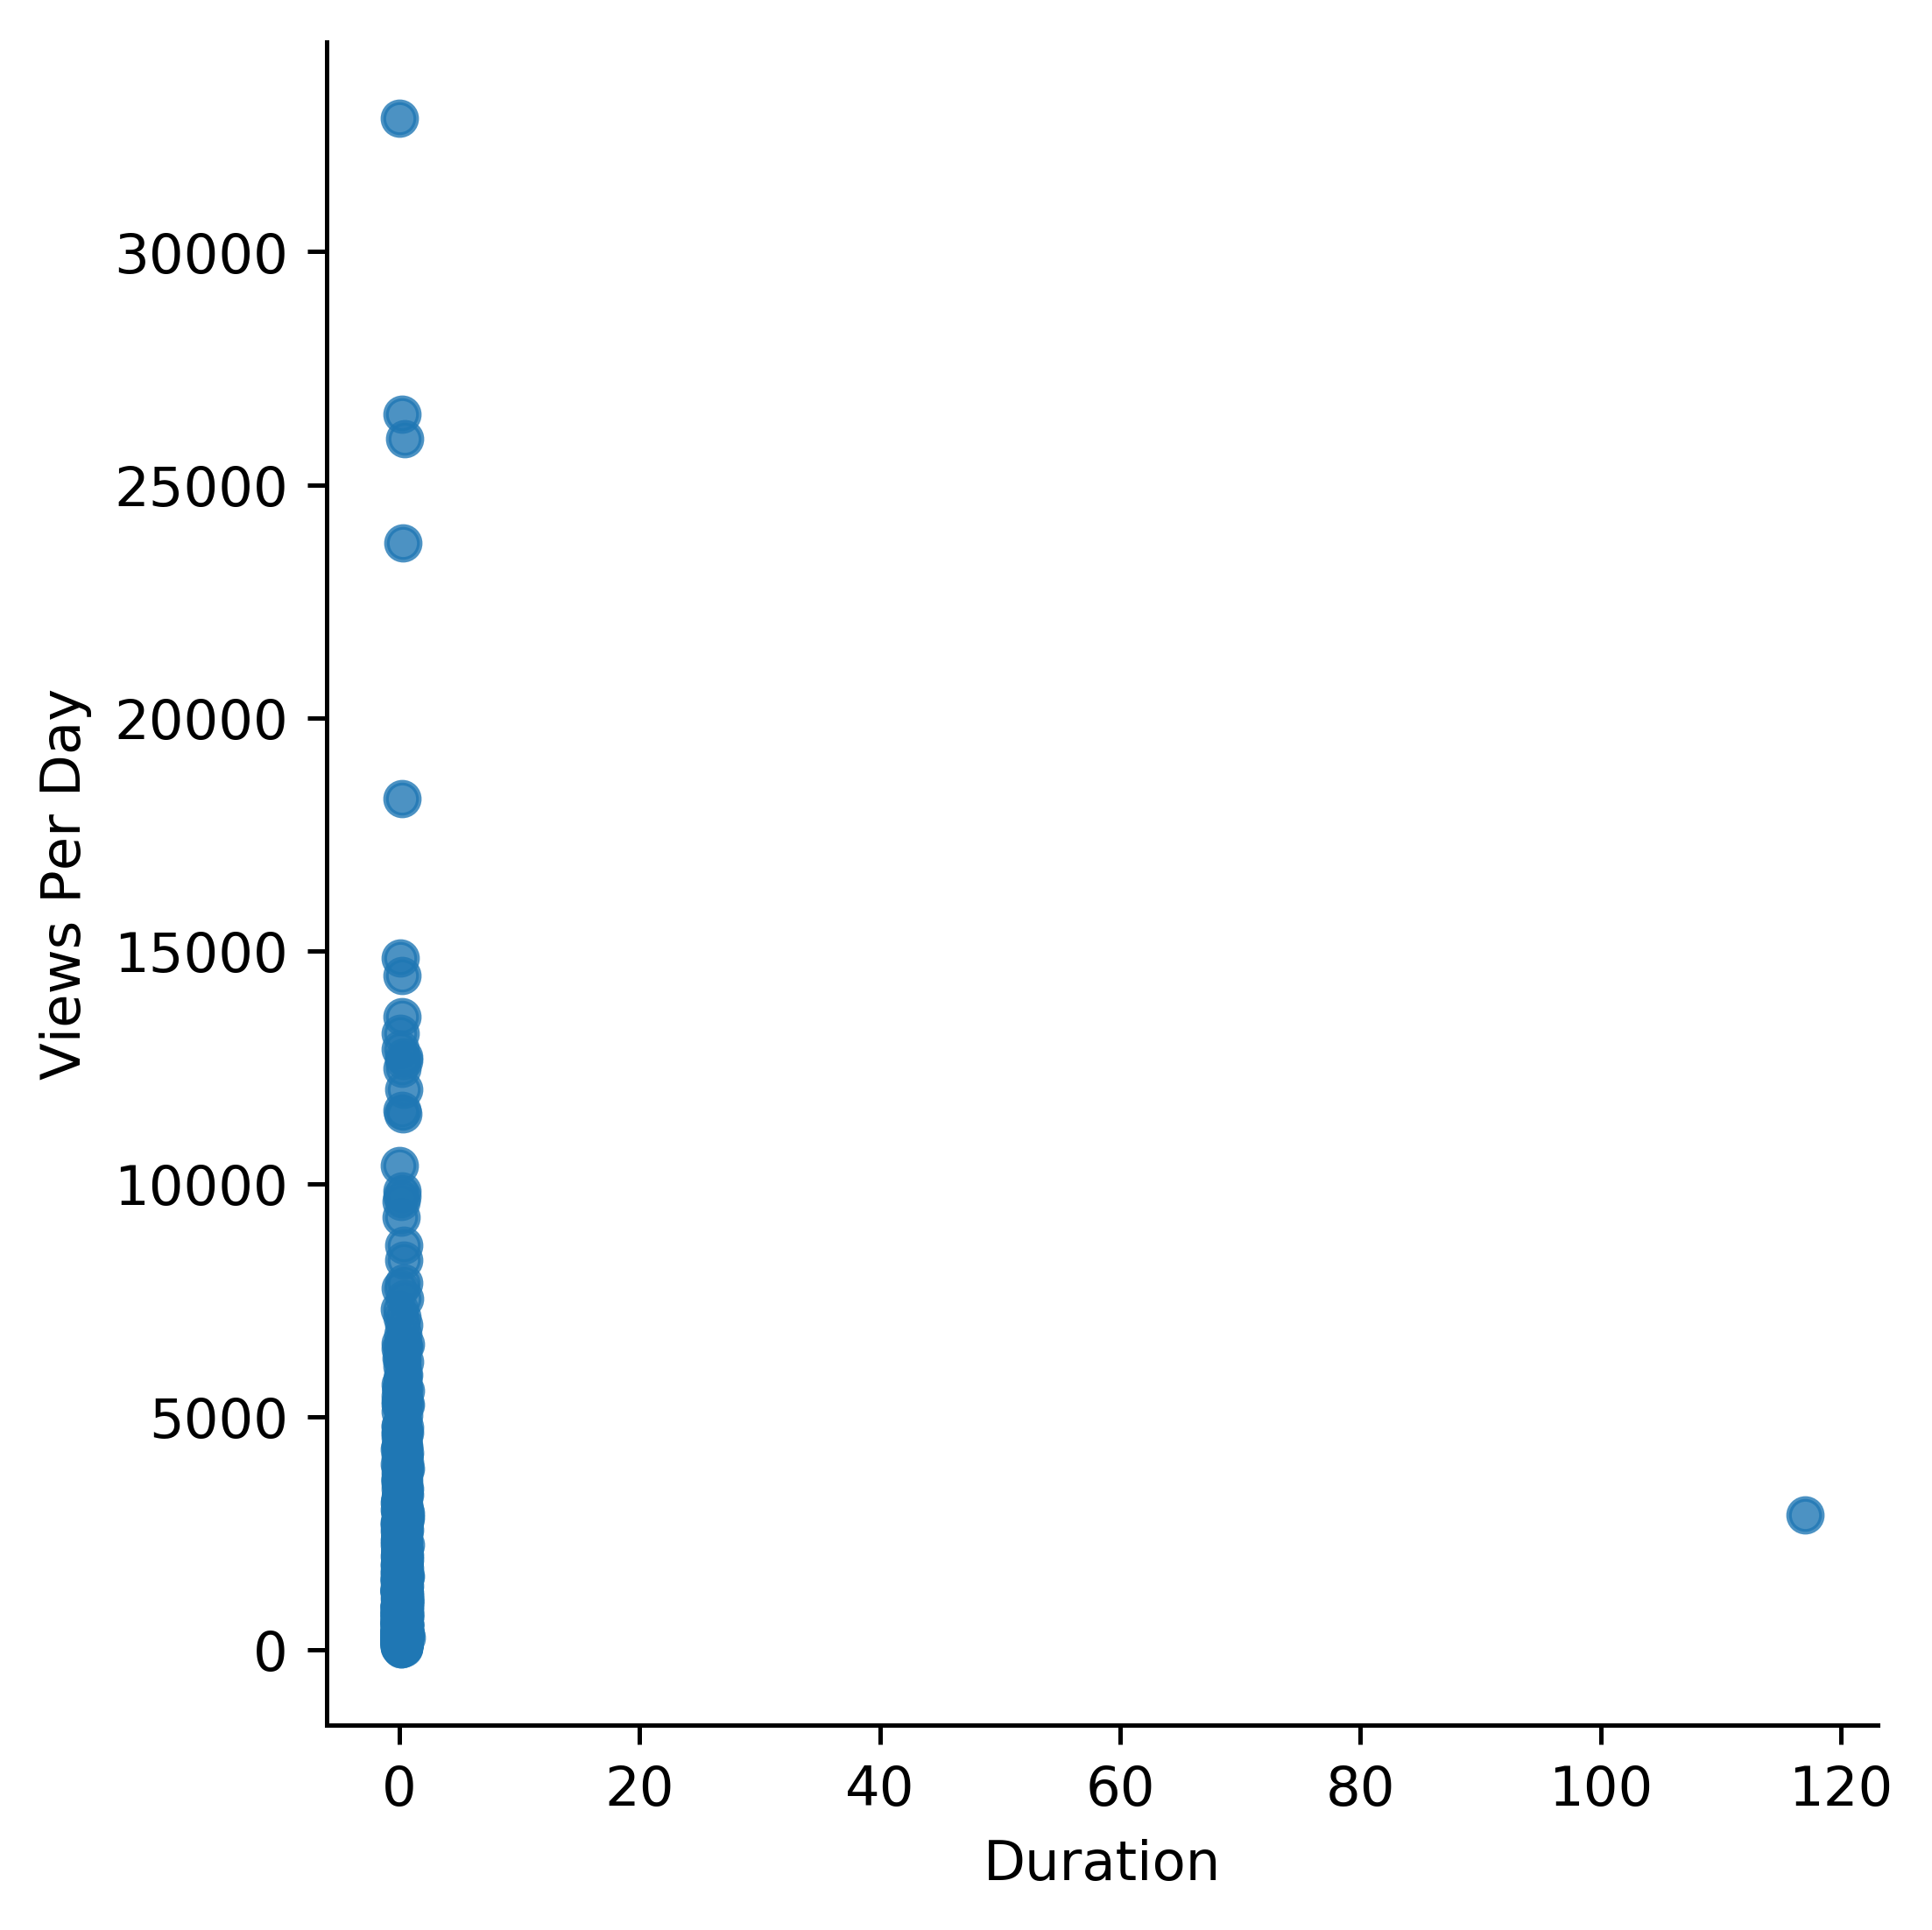

In [51]:
fig = sns.lmplot(y="views_pd", x="Inspiring", data=df, fit_reg = False)
fig = fig.set_axis_labels('Duration', 'Views Per Day')

## Pulling out tags for dummy variables

The goal is to pull out the tags associated with each video, then apply them as dummy variables in order to decide if they have a big affect on total views.

In [52]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [53]:
def uniqueitems(unfiltered):
    unique_list = []
    for x in unfiltered:
        if x not in unique_list and len(x)>4:
            unique_list.append(x)
    return unique_list

In [54]:
def allthetags(extagaganza):
    tags = []
    dummy_dict = {}
    for i in range(len(extagaganza)):    
        tagrage = extagaganza[i].split('\'')
        taglen = len(tagrage)
        for k in range(1,taglen,2):
            tags.append(tagrage[k])
    uni_tag = uniqueitems(tags)
    for i in uni_tag:
        dummy_dict[i] = [1]
    return dummy_dict, uni_tag

In [55]:
tag_dict={}
tag_dict, unitags = allthetags(data.tags)
for i in range(len(data.tags)):
    tagrage = data.tags[i].split('\'')
    taglen = len(tagrage)
    tags = [tagrage[k] for k in range(1,taglen,2)]
    # for loop  to fill in 1s and 0s for the dummy variables
    for d in tag_dict:
        if d in tags:
            tag_dict[d].append(1)
        else:
            tag_dict[d].append(0) 


In [56]:
tag_df = pd.DataFrame(tag_dict) 
tag_df.drop(0, inplace=True)
tag_df.reset_index(drop=True, inplace = True)

In [57]:
#Dummy variable dataframe
inter_df = df.copy()
inter_df.drop('num_speaker',axis=1, inplace =True)
inter_df.drop('related_talks',axis=1, inplace =True)
inter_df.drop('speaker_occupation',axis=1, inplace =True)

In [3]:
tag_df = inter_df.join(tag_df)


NameError: name 'inter_df' is not defined

In [ ]:
a_max = tag_df.views.max()
a_min = tag_df.views.min()
tag_df['views'] = tag_df['views'].apply(lambda x: ((x-a_min)/(a_max-a_min)))

In [ ]:
sns.heatmap(tag_df.corr(), cmap = 'seismic',annot=True)

In [1]:
fig = sns.lmplot(y="views_pd", x="duration", data=tag_df, fit_reg = False)
fig = fig.set_axis_labels('Duration', 'Views')

NameError: name 'sns' is not defined

In [2]:
tag_df.columns

NameError: name 'tag_df' is not defined

In [ ]:
['days_online','languages','Courageous', 'Beautiful', 'Confusing', 'Funny', 'Ingenious', 'Unconvincing', 'Longwinded', 'Informative', 'Inspiring', 'Fascinating', 'Persuasive', 'Jaw-dropping','Obnoxious',\
          'children', 'creativity', 'culture', 'dance', 'education', 'parenting', 'teaching', 'alternative energy', 'climate change', 'environment', 'global issues', 'science', 'sustainability', 'technology', 'computers', 'entertainment', 'interface design', 'media', 'music', 'performance', 'simplicity',\
           'software', 'MacArthur grant', 'activism', 'business', 'cities', 'green', 'inequality', 'politics', 'pollution', 'Africa', 'Google', 'economics', 'global development', 'health', 'statistics', 'visualizations', 'goal-setting', 'motivation', 'potential', 'psychology',\
           'Christianity', 'atheism', 'comedy', 'humor', 'religion', 'storytelling', 'architecture', 'collaboration', 'design', 'library', 'TED Brain Trust', 'brain', 'cognitive science', 'consciousness', 'evolution', 'philosophy','happiness',\
           'leadership', 'philanthropy', 'disaster relief', 'invention', 'open-source', 'TED Prize', 'movies', 'peace', 'social change', 'disease', 'ebola', 'entrepreneur', 'violin', 'wunderkind', 'youth', 'piano', 'engineering', 'industrial design', 'biology', 'nature', 'product design', 'science and art', 'wikipedia',\
           'community', 'communication', 'gender', 'relationships', 'theater', 'women', 'cosmos', 'physics', 'universe', 'astronomy', 'narcotics', 'choice', 'consumerism', 'marketing', 'decision-making', 'personal growth', 'cancer', 'aging', 'biotech', 'future', 'health care', 'investment', 'microfinance', 'poverty', 'telecom', 'transportation', 'corruption', 'military', 'policy',\
           'aircraft', 'flight', 'rocket science', 'exploration', 'sports', 'travel', 'photography', 'medicine', 'genetics', 'faith', 'illusion', 'robots', 'history', 'success', 'poetry', 'obesity', 'anthropology', 'language', 'complexity',\
           'evolutionary psychology', 'urban planning', 'innovation', 'United States', 'interview', 'performance art', 'materials', 'work-life balance', 'biodiversity', 'ecology', 'insects', 'animals', 'primates', 'typography', 'live music', 'singer', 'Brazil', 'animation', 'biomimicry', 'oceans', 'intelligence', 'biomechanics', 'online video', 'guitar', 'vocals', 'cello', 'china', 'memory', 'spoken word', 'composing', 'natural disaster',\
           'energy', 'museums', 'water', 'microsoft', 'virtual reality', 'women in business', 'Buddhism', 'New York', 'death', 'terrorism', 'Planets', 'adventure', 'mining', 'space', 'Bioethics', 'gaming', 'literature', 'prosthetics', 'books', 'sociology', 'violence', 'human origins', 'humanity', 'paleontology', 'asteroid', 'solar system', 'drones', 'solar energy', 'illness', 'depression', 'mental health', 'suicide', 'String theory', 'magic',\
           'compassion', 'empathy', 'writing', 'South America', 'world cultures', 'infrastructure', 'ancient world', 'garden', 'plants', 'telescopes', 'heart health', 'public health', 'big bang', 'bacteria', 'microbiology', 'submarine', 'society', 'archaeology', 'dinosaurs','beauty',\
           'plastic', 'Vaccines', 'conducting', 'family', 'trees', 'astrobiology', 'extraterrestrial life', 'introvert', 'personality', 'origami', 'dark matter', 'identity', 'nanoscale', 'geology', 'morality', 'presentation', 'crime',\
           'prison', 'democracy', 'smell', 'charter for compassion', 'social media', 'Senses', 'fashion', 'curiosity', 'programming', 'chemistry', 'shopping', 'body language', 'virus', 'birds', 'wind energy', 'extreme sports', 'prediction','productivity',\
           'TED Fellows', 'Natural resources', 'agriculture', 'india', 'neuroscience', 'money', 'state-building', 'Anthropocene', 'Europe', 'sight', 'Internet', 'government', 'advertising', 'sanitation', 'weather',\
           'big problems', 'rivers', 'Slavery', 'sexual violence', 'trafficking', 'Egypt', 'novel', 'feminism', 'TEDMED', 'Autism spectrum disorder', 'botany', 'mission blue', 'friendship','student',\
           'nuclear weapons', 'Surveillance', 'Islam', 'monkeys', 'Middle East', 'sound', 'population', 'manufacturing', 'TEDYouth', 'Gender equality', 'bullying', 'trust', 'sleep','journalism',\
           'cyborg', 'Foreign Policy', 'Surgery', 'medical research', 'protests', 'deextinction', 'disability',\
           'exoskeleton', 'nuclear energy', 'driverless cars', 'crowdsourcing', 'Brand', 'speech', 'failure', 'security', 'Blindness', 'Gender spectrum', 'glacier', 'mobility','TED en Español', 'public spaces',\
           'Human body', 'nonviolence', 'pharmaceuticals', 'molecular biology', 'behavioral economics', 'medical imaging', 'physiology', 'pregnancy', 'synthetic biology',\
           'hearing', 'Nobel prize', 'finance', 'algorithm', '3d printing', 'conservation', 'immigration', 'Criminal Justice','TED-Ed',\
           'privacy', 'microbes', 'machine learning', 'skateboarding', 'augmented reality', 'forensics', 'painting', 'pandemic',\
           'meditation', 'mindfulness', 'Syria', 'Transgender', 'testing', 'Debate', 'farming', 'cloud', 'TED Books', 'television','street art',\
           'Addiction', 'CRISPR', 'vulnerability', 'capitalism', 'refugees', 'grammar', 'resources', 'discovery', 'blockchain','TEDNYC','urban','TED Residency','biosphere']

In [ ]:
y = tag_df.views_pd
X = tag_df.drop(['event', 'film_date', 'main_speaker', 'meditation', 'published_date', 'tags', 'title', 'views', 'views_pd'],1)
model = sm.OLS(y,X)
fit = model.fit()
fit.summary()

In [ ]:
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest
from sklearn.cross_validation import cross_val_score

sig_cols = []
pvals = []

pvals = f_regression(X,y)



In [ ]:
y.mean()

In [ ]:
est = LinearRegression()
mean_sc = 0
for i in range(2,40):
    X_new =SelectKBest(f_regression, k = i).fit_transform(X,y)
    scores = cross_val_score(est, X_new , y, cv=10, scoring='neg_mean_squared_error')

    delta_sc = np.mean(-scores) - mean_sc
    #if delta_sc <0:
     #   print(i,np.mean(-scores))
     #   break  
    #else:
     #   mean_sc = np.mean(-scores)
    print(i,np.mean(-scores))
        




## Transcripts of Presentations

Below is an analysis over the transcripts to see if any insight can be found.

In [ ]:
transcripts = pd.read_csv('transcripts.csv')

In [ ]:
transcripts['wc'] = transcripts['transcript'].apply(lambda x: len(x.split(' ')))
transcripts['wpm'] = transcripts['wc']/data['duration']
test_trans = transcripts.copy()
transcripts = transcripts.dropna()

test_trans['wpm'] = test_trans['wc']/test_df['duration']


In [ ]:
test_trans.dropna(inplace = True)
test_trans